In [1]:
import pandas as pd
df = pd.read_csv('/content/AAPL_Processed.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_MA,200_MA
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df = df.set_index('Date')

# Checking for null values
df.isnull().sum()





,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
50_MA,49
200_MA,199


In [3]:

# Explore basic statistics
print(df.describe())

print(df.info())

              Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume        50_MA       200_MA  
count  2.011000e+03  1962.000000  1812.000000  
mean   5.949670e+07   125.711062   123.556670  
std    4.683856e+07    47.578927    42.955210  
min    1.136200e+07    61.294886    65.028200  
25%    2.758565e+07    85.276600    85.472157  
50%    4.346900e+07   112.847400   113.402475

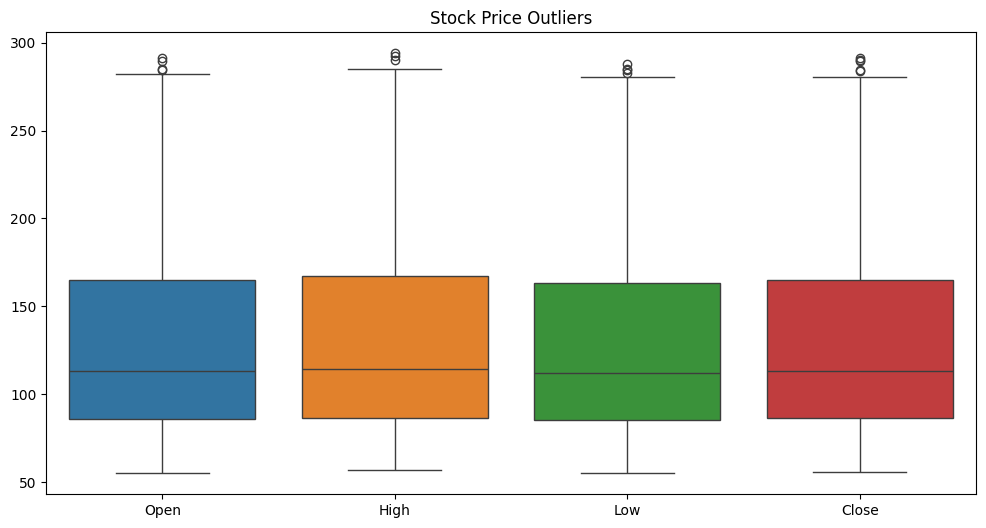

In [4]:
#Outliers detection for features of stock market analysis
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Stock Price Outliers")
plt.show()


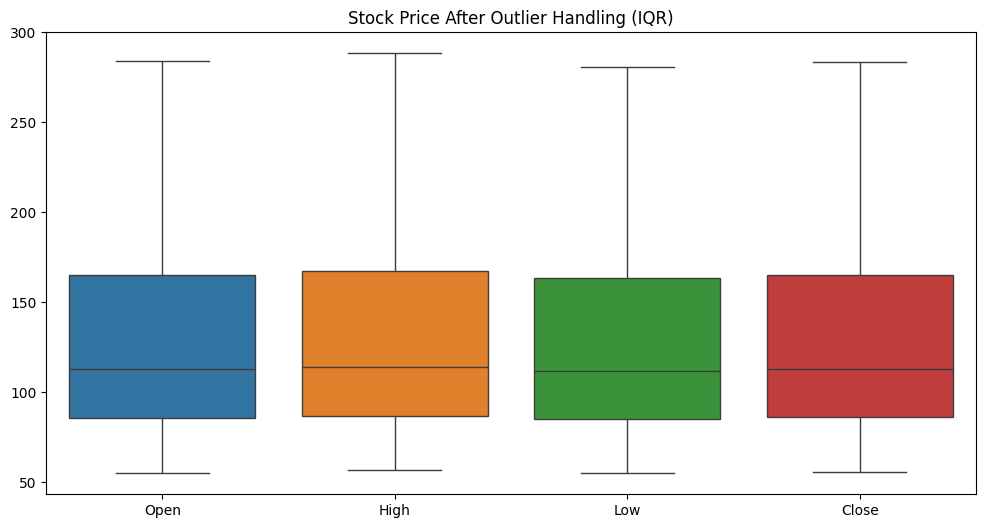

In [5]:
# prompt: handle outliers

import matplotlib.pyplot as plt
import numpy as np
# IQR method to handle outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)

    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply IQR method to relevant columns
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:  # Include 'Volume' as well
    df = handle_outliers_iqr(df, col)


# Visualize the data after outlier handling
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Stock Price After Outlier Handling (IQR)")
plt.show()


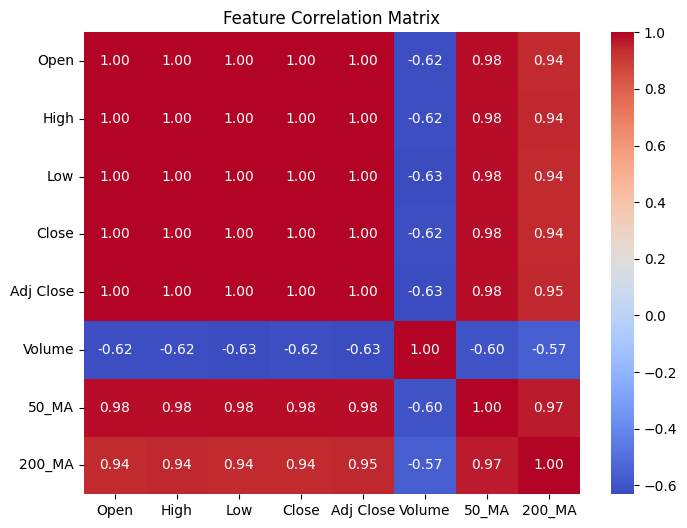

In [6]:
#Correlation among the features
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

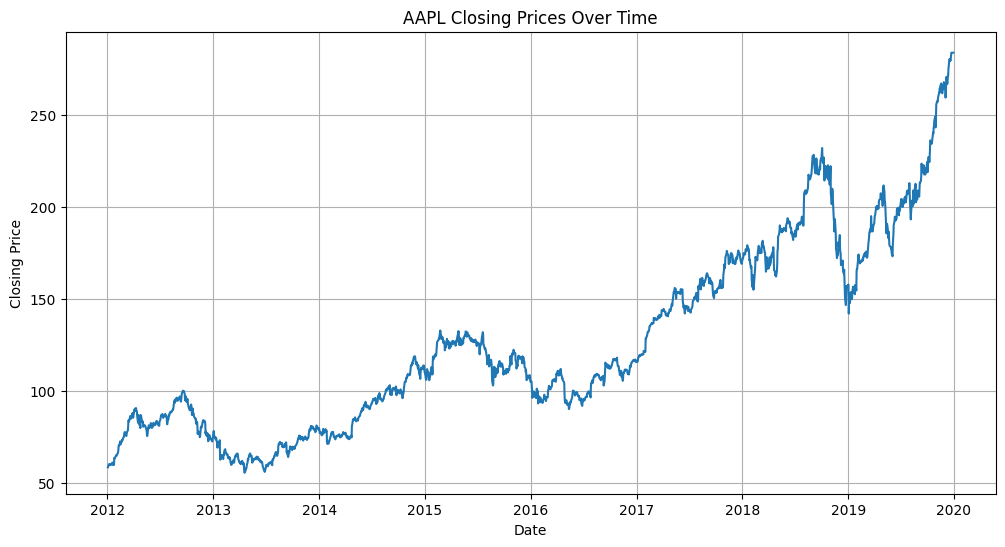

In [7]:
# Visualize closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

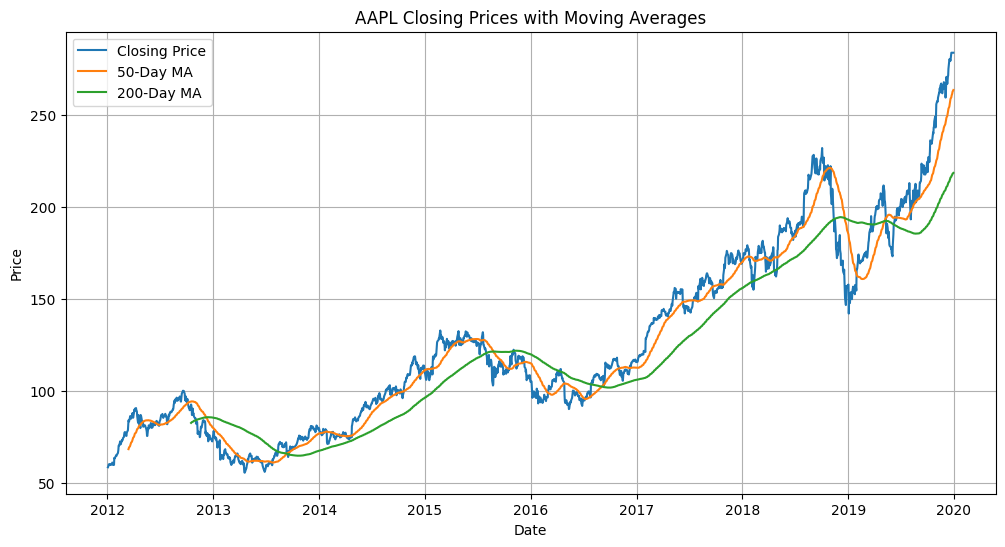

In [8]:
# Calculate and visualize moving averages (e.g., 50-day and 200-day)
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.title('AAPL Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price'
)
plt.legend()
plt.grid(True)
plt.show()

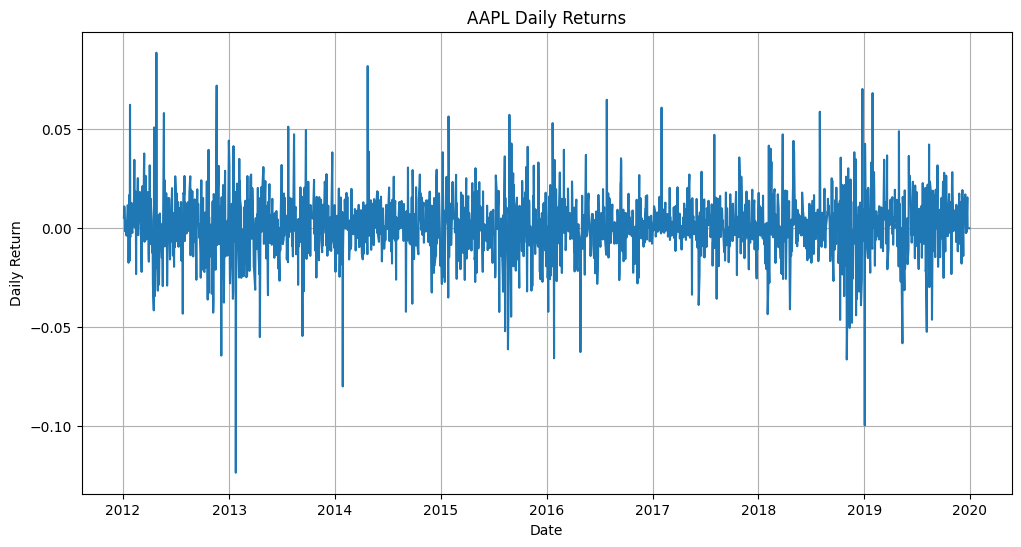

In [9]:
# Calculate and visualize daily returns
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(df['Daily_Return'])
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

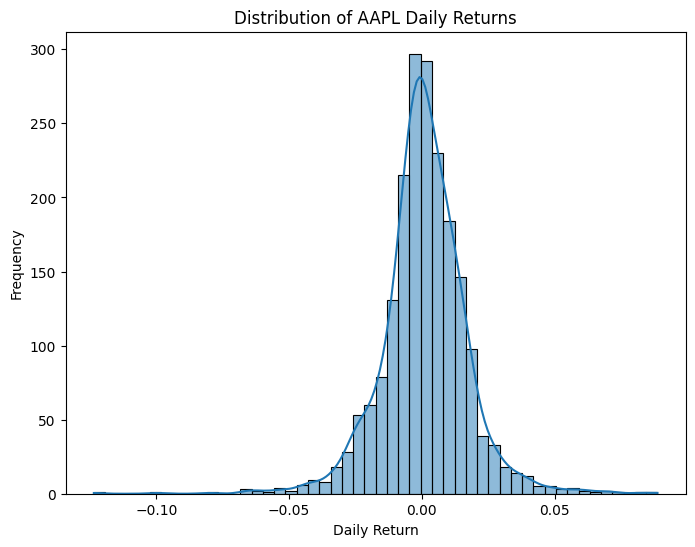

In [10]:
# Histogram of daily returns
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of AAPL Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

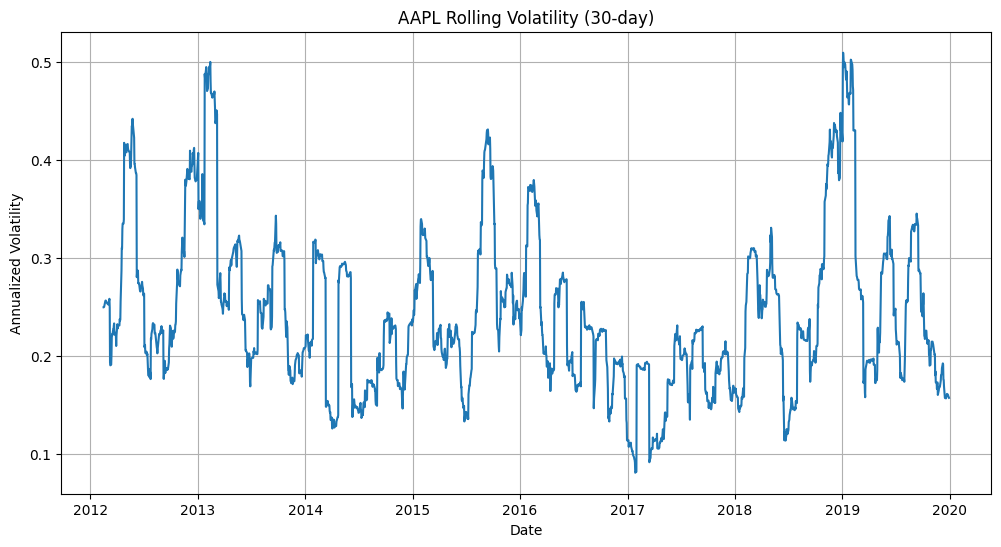

In [11]:
# Analyze volatility (e.g., rolling standard deviation)
df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * (252**0.5) # Annualized Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Volatility'])
plt.title('AAPL Rolling Volatility (30-day)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.grid(True)
plt.show()



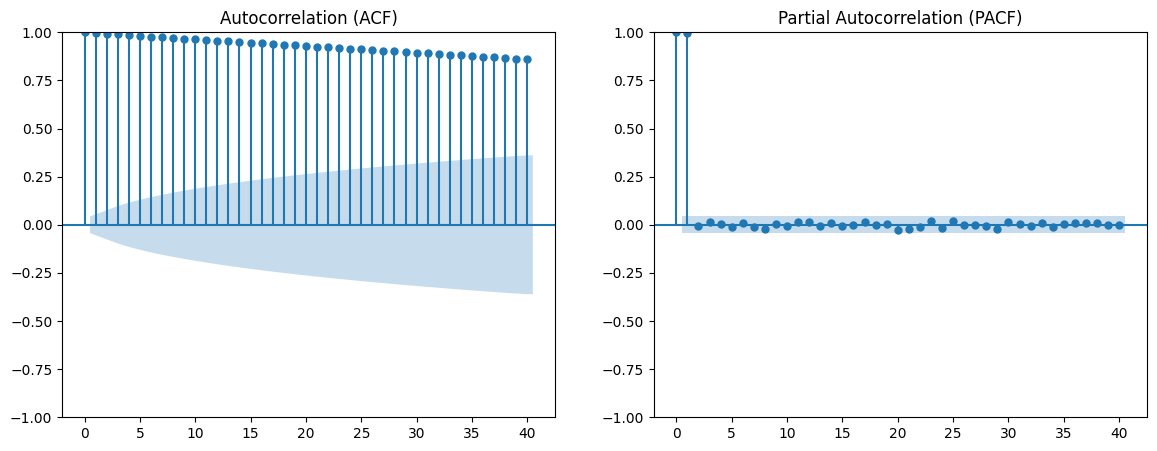

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Plot ACF & PACF
fig, ax = plt.subplots(1, 2, figsize=(14,5))

# ACF (Autocorrelation Function)
sm.graphics.tsa.plot_acf(df['Close'], lags=40, ax=ax[0])
ax[0].set_title("Autocorrelation (ACF)")

# PACF (Partial Autocorrelation Function)
sm.graphics.tsa.plot_pacf(df['Close'], lags=40, ax=ax[1])
ax[1].set_title("Partial Autocorrelation (PACF)")

plt.show()


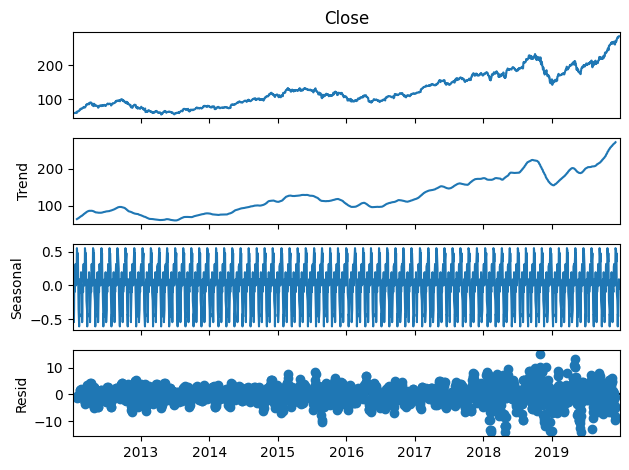

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform Decomposition
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=30)
decomposition.plot()
plt.show()


In [14]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.4 MB/s eta 0:00:00


In [15]:
from pmdarima import auto_arima

# Auto-SARIMA model
auto_sarima = auto_arima(df['Close'],
                         seasonal=True,
                         m=30,  # Change this based on ACF results
                         stepwise=True,
                         trace=True)

# Print the best SARIMA order
print(f"Best SARIMA Order: {auto_sarima.order} × {auto_sarima.seasonal_order}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=8736.956, Time=44.66 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=8734.256, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=8737.995, Time=3.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=8737.962, Time=3.86 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=8737.840, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[30] intercept   : AIC=8736.254, Time=3.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[30] intercept   : AIC=8736.254, Time=2.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[30] intercept   : AIC=8738.254, Time=3.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=8736.002, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=8735.969, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=8735.608, Time=1.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[30] intercept
Total fit time: 63.878 seconds
Best SARIMA Order: (0, 1, 0) × (0, 0, 0, 30)


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set best SARIMA parameters (update with your results)
best_order = (0, 1, 0)  # Replace with auto_sarima.order
best_seasonal_order = (0, 0, 0, 30)  # Replace with auto_sarima.seasonal_order

# Train the SARIMA model
sarima_model = SARIMAX(df['Close'],
                       order=best_order,
                       seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit()

# Print model summary
print(sarima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2011
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4367.920
Date:                Tue, 25 Feb 2025   AIC                           8737.840
Time:                        07:12:26   BIC                           8743.446
Sample:                             0   HQIC                          8739.898
                               - 2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.5191      0.069     65.232      0.000       4.383       4.655
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              3716.24
Prob(Q):                              0.61   Pr

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming 'df' is your DataFrame with the entire dataset
# Split the data into train and test sets (adjust the split ratio as needed)
train_size = int(len(df) * 0.8)  # Use 80% for training
train, test = df[:train_size], df[train_size:]

# Get predictions from your fitted SARIMA model (sarima_fit)
# Assuming you want to predict for the entire test set
sarima_pred = sarima_fit.predict(start=test.index[0], end=test.index[-1])

# Ensure test['Close'] matches prediction length
test_trimmed = test['Close'][:len(sarima_pred)]

### **SARIMA Model Evaluation**
rmse_sarima = np.sqrt(mean_squared_error(test_trimmed, sarima_pred))
mae_sarima = mean_absolute_error(test_trimmed, sarima_pred)
mape_sarima = mean_absolute_percentage_error(test_trimmed, sarima_pred)
aic_sarima = sarima_fit.aic
bic_sarima = sarima_fit.bic

# Print Results
print(" **SARIMA Model Evaluation** ")
print(f" RMSE: {rmse_sarima:.2f}")
print(f" MAE: {mae_sarima:.2f}")
print(f" MAPE: {mape_sarima:.2f}%")
print(f" AIC: {aic_sarima:.2f}")
print(f" BIC: {bic_sarima:.2f}")

 **SARIMA Model Evaluation** 
 RMSE: 3.42
 MAE: 2.46
 MAPE: 1.24%
 AIC: 8737.84
 BIC: 8743.45


Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6163.594, Time=3.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6171.048, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6170.539, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6170.380, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6172.891, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6173.135, Time=0.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6173.023, Time=1.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6164.967, Time=6.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6164.979, Time=7.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6171.665, Time=3.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6174.625, Time=5.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6174.427, Time=5.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6166.053, Time=12.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6165.218, Time=0.93 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 48.125 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-18-e01e50fef99d>:9: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp'

📊 **Auto ARIMA Model Evaluation** 📊
✅ RMSE: 26.24
✅ MAE: 20.71
✅ MAPE: nan%
✅ AIC: 6163.59
✅ BIC: 6195.89


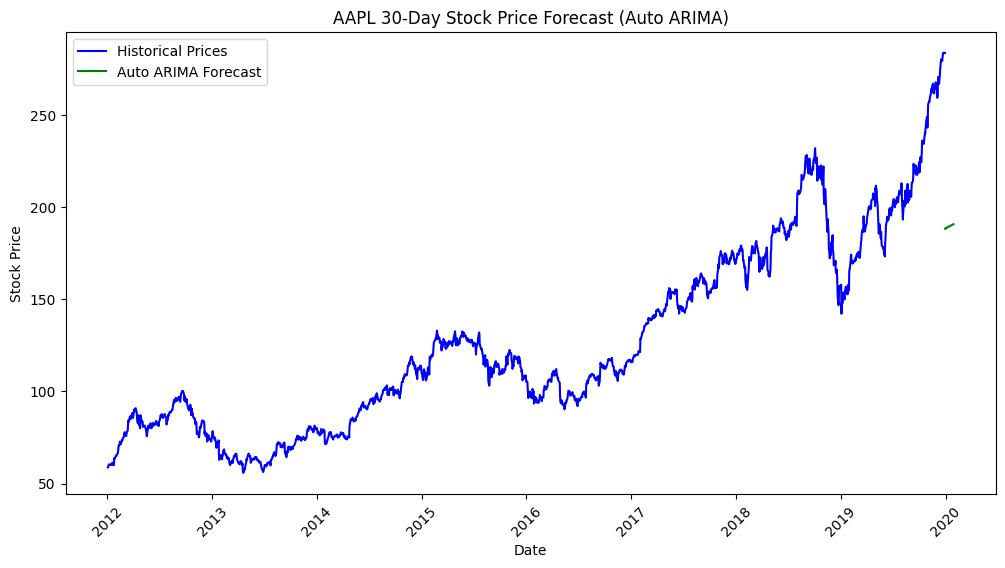

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### **Train Auto ARIMA Model**
auto_arima_model = auto_arima(train['Close'], seasonal=False, trace=True, suppress_warnings=True)
auto_arima_fit = auto_arima_model.fit(train['Close'])

# Predict on test data
auto_arima_pred = auto_arima_fit.predict(n_periods=len(test))

# Ensure test['Close'] matches prediction length
test_trimmed = test['Close'][:len(auto_arima_pred)]

### **Auto ARIMA Model Evaluation**
rmse_auto_arima = np.sqrt(mean_squared_error(test_trimmed, auto_arima_pred))
mae_auto_arima = mean_absolute_error(test_trimmed, auto_arima_pred)
mape_auto_arima = mean_absolute_percentage_error(test_trimmed, auto_arima_pred)
aic_auto_arima = auto_arima_fit.aic()
bic_auto_arima = auto_arima_fit.bic()

# Print Results
print("📊 **Auto ARIMA Model Evaluation** 📊")
print(f"✅ RMSE: {rmse_auto_arima:.2f}")
print(f"✅ MAE: {mae_auto_arima:.2f}")
print(f"✅ MAPE: {mape_auto_arima:.2f}%")
print(f"✅ AIC: {aic_auto_arima:.2f}")
print(f"✅ BIC: {bic_auto_arima:.2f}")

### **Forecast next 30 days using Auto ARIMA**
auto_arima_forecast = auto_arima_fit.predict(n_periods=30)

# Create future date range
future_dates = pd.date_range(start=test.index[-1], periods=30, freq='D')

# Store forecasted values in a DataFrame
auto_arima_forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Auto ARIMA Forecast": auto_arima_forecast
})

# Save to CSV (optional)
auto_arima_forecast_df.to_csv("AutoARIMA_30day_forecast.csv", index=False)

# Plot Auto ARIMA Forecast
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Historical Prices", color='blue')
plt.plot(auto_arima_forecast_df['Date'], auto_arima_forecast_df['Auto ARIMA Forecast'], label="Auto ARIMA Forecast", color='green')
plt.legend()
plt.title("AAPL 30-Day Stock Price Forecast (Auto ARIMA)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


         Date  SARIMA Forecast
0  2019-12-30       283.809289
1  2019-12-31       283.809289
2  2020-01-01       283.809289
3  2020-01-02       283.809289
4  2020-01-03       283.809289
5  2020-01-04       283.809289
6  2020-01-05       283.809289
7  2020-01-06       283.809289
8  2020-01-07       283.809289
9  2020-01-08       283.809289
10 2020-01-09       283.809289
11 2020-01-10       283.809289
12 2020-01-11       283.809289
13 2020-01-12       283.809289
14 2020-01-13       283.809289
15 2020-01-14       283.809289
16 2020-01-15       283.809289
17 2020-01-16       283.809289
18 2020-01-17       283.809289
19 2020-01-18       283.809289
20 2020-01-19       283.809289
21 2020-01-20       283.809289
22 2020-01-21       283.809289
23 2020-01-22       283.809289
24 2020-01-23       283.809289
25 2020-01-24       283.809289
26 2020-01-25       283.809289
27 2020-01-26       283.809289
28 2020-01-27       283.809289
29 2020-01-28       283.809289


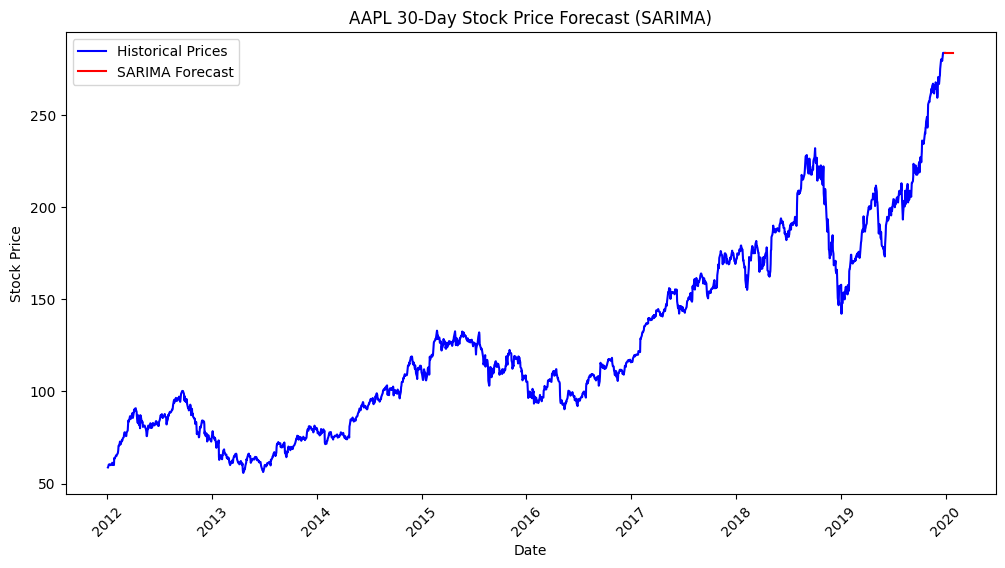

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Forecast next 30 days using SARIMA
sarima_forecast = sarima_fit.forecast(steps=30)

# Create a date range for the next 30 days
future_dates = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Store forecasts in a DataFrame
sarima_forecast_df = pd.DataFrame({
    "Date": future_dates,
    "SARIMA Forecast": sarima_forecast.values
})

# Print forecast values
print(sarima_forecast_df)

# Save forecast to CSV (optional)
sarima_forecast_df.to_csv("SARIMA_30day_forecast.csv", index=False)

# Plot SARIMA Forecast
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Historical Prices", color='blue')
plt.plot(sarima_forecast_df['Date'], sarima_forecast_df['SARIMA Forecast'], label="SARIMA Forecast", color='red')
plt.legend()
plt.title("AAPL 30-Day Stock Price Forecast (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.show()


In [21]:
# prompt: why is the same for next 30 days

# ... (your existing code)

# Auto-SARIMA model with different 'm'
auto_sarima = auto_arima(df['Close'],
                         seasonal=True,
                         m=7,  # Try a weekly seasonality
                         stepwise=True,
                         trace=True)

# ... (rest of your code)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=8714.900, Time=15.92 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=8734.256, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=8725.400, Time=1.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=8726.128, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=8737.840, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=8719.997, Time=7.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=8718.780, Time=3.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=8716.043, Time=16.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=8716.004, Time=19.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=8733.028, Time=2.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=8719.719, Time=6.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=8718.871, Time=8.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=8717.560, Time=18.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=8716.525, Time=5.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=8715.768, Time=3.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[7] intercept   : AIC=8714.604, Time=14.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,1)[7] intercept   : AIC=8721.057, Time=8.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,0)[7] intercept   : AIC=8719.698, Time=9.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,1)[7] intercept   : AIC=8716.074, Time=19.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[7] intercept   : AIC=8716.038, Time=19.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=8721.260, Time=7.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,2)[7] intercept   : AIC=8719.897, Time=12.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,0)[7] intercept   : AIC=8718.745, Time=12.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,2)[7] intercept   : AIC=8717.443, Time=19.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,1)[7] intercept   : AIC=8716.220, Time=7.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(1,0,1)[7] intercept   : AIC=8717.916, Time=12.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[7] intercept   : AIC=8715.525, Time=14.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[7] intercept   : AIC=8715.081, Time=11.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(1,0,1)[7] intercept   : AIC=8716.473, Time=6.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(1,0,1)[7] intercept   : AIC=8718.585, Time=11.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[7]             : AIC=8716.275, Time=5.60 sec

Best model:  ARIMA(3,1,2)(1,0,1)[7] intercept
Total fit time: 303.388 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


         Date  SARIMA Forecast    Lower CI    Upper CI
0  2019-12-30       283.809289  279.642775  287.975804
1  2019-12-31       283.809289  277.916949  289.701630
2  2020-01-01       283.809289  276.592676  291.025903
3  2020-01-02       283.809289  275.476261  292.142318
4  2020-01-03       283.809289  274.492681  293.125898
5  2020-01-04       283.809289  273.603456  294.015123
6  2020-01-05       283.809289  272.785730  294.832849
7  2020-01-06       283.809289  272.024608  295.593971
8  2020-01-07       283.809289  271.309747  296.308832
9  2020-01-08       283.809289  270.633615  296.984964
10 2020-01-09       283.809289  269.990526  297.628053
11 2020-01-10       283.809289  269.376062  298.242517
12 2020-01-11       283.809289  268.786710  298.831869
13 2020-01-12       283.809289  268.219622  299.398957
14 2020-01-13       283.809289  267.672450  299.946129
15 2020-01-14       283.809289  267.143233  300.475346
16 2020-01-15       283.809289  266.630312  300.988267
17 2020-01

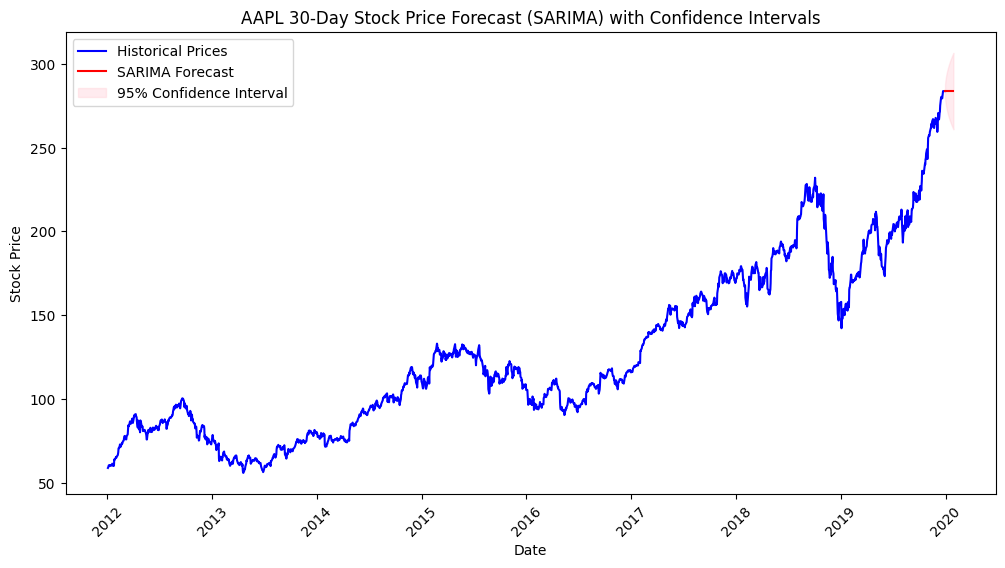

In [22]:
# prompt: predict for next 30 days using sarima

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'df' and 'sarima_fit' are already defined from the previous code.

# Forecast next 30 days using SARIMA
sarima_forecast = sarima_fit.get_forecast(steps=30)
sarima_forecast_ci = sarima_forecast.conf_int()

# Create a date range for the next 30 days
future_dates = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Store forecasts in a DataFrame
sarima_forecast_df = pd.DataFrame({
    "Date": future_dates,
    "SARIMA Forecast": sarima_forecast.predicted_mean.values,
    "Lower CI": sarima_forecast_ci['lower Close'].values,
    "Upper CI": sarima_forecast_ci['upper Close'].values
})

# Print forecast values
print(sarima_forecast_df)

# Save forecast to CSV (optional)
sarima_forecast_df.to_csv("SARIMA_30day_forecast_with_CI.csv", index=False)

# Plot SARIMA Forecast with confidence intervals
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Historical Prices", color='blue')
plt.plot(sarima_forecast_df['Date'], sarima_forecast_df['SARIMA Forecast'], label="SARIMA Forecast", color='red')
plt.fill_between(sarima_forecast_df['Date'], sarima_forecast_df['Lower CI'], sarima_forecast_df['Upper CI'], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.legend()
plt.title("AAPL 30-Day Stock Price Forecast (SARIMA) with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.show()


In [23]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [24]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
import pickle

In [25]:
# Load dataset
def load_data():
    file_path = "AAPL_Processed.csv"
    df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")
    return df

In [26]:
def plot_stock_data(df):
    fig = px.line(df, x=df.index, y="Close", title="Apple Stock Closing Prices")
    st.plotly_chart(fig)


In [27]:
def train_arima_model(df):
    model = ARIMA(df['Close'], order=(5,1,0))
    model_fit = model.fit()
    with open("arima_model.pkl", "wb") as f:
        pickle.dump(model_fit, f)
    return model_fit

In [28]:
def load_model():
    with open("arima_model.pkl", "rb") as f:
        model = pickle.load(f)
    return model

In [29]:
def forecast_next_days(model, steps=30):
    forecast = model.forecast(steps=steps)
    return forecast


In [30]:

# Streamlit UI
st.title("Apple Stock Market Analysis and Prediction")

2025-02-25 07:24:11.269 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:11.595 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-25 07:24:11.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [31]:
df = load_data()
st.subheader("Stock Data Preview")
st.write(df.tail())


2025-02-25 07:24:16.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:16.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:16.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:16.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [32]:
plot_stock_data(df)


2025-02-25 07:24:25.486 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:25.487 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:25.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:25.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [33]:
if st.button("Train Model"):
    model = train_arima_model(df)
    st.success("Model Trained and Saved!")


2025-02-25 07:24:29.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:29.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:29.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:29.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:29.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [34]:
if st.button("Predict Next 30 Days"):
    model = load_model()
    forecast = forecast_next_days(model, steps=30)
    st.subheader("30-Day Stock Price Prediction")
    st.line_chart(forecast)


2025-02-25 07:24:32.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:32.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:32.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:32.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 07:24:32.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [36]:
#install required libraries
!pip install joblib pandas numpy